# Bayesian Linear Regression - Toy Example - Based on Bishop's $\S$ 3.3.1
Consider a single variable $x$ a single target variable $t$ and a linear model of the form:
$$y(x,\vec{w})= w_0 + w_1x.$$
Because this has two adaptative parameters, we can plot the prior and posterior distributions directly in parameter space. The dataset we will use for this endeavor is given by:
$$f(x,\vec{a})= a_0 + a_1x,$$
where:
\begin{align*}
a_0&=-0.3,\\
a_1&=0.5,
\end{align*}
the $x_n$ datapoints are to be drawn from a uniform distribution $U(x|-1,1)$, the function $f(x, \vec{a})$ is then evaluated and Gaussian noise with standard deviation of $0.2$ is added to obtain the target values $t_n$. Our goal is to recover the values of $a_0$ and $a_1$ from the synthetic dataset, exploring the dependence on sample size. 

## Synthetic data generation

In [42]:
import sys
sys.path.append('../src/utils/')

In [43]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from plotting import clean_ax

plt.style.use('dark_background')

In [44]:
def func(x: float, a: list[float] = [-0.3, 0.5]) -> float:
    """Two parameter linear function to be approximated
    Parameters
    ----------
    x: float,
        real-valued input variable
    a: list[float], (default = [-0.3, 0,5])
        line parameters vector
    Returns
    -------
    f(x): float,
        linear function output
    """
    return a[0]+a[1]*x

In [45]:
# To generate the actual dataset we will create a different function
def get_X_y(low:float = -1, high:float = 1, sample_size: int = 25, random_seed: int = 42):
    """Produces the X and y sample, given the uniform 
    distribution parameters and the sample size
    Parameters
    ----------
    low: float (default = 0.0)
        low limit for uniform distribution
    high: float (default = 1.0)
        hihg limit for uniform distribution
    sample_size: int (default = 25)
        size of the sample to be generated
    random_seed: int (default = 42)
        random state seed

    Returns
    -------
    X: list[float]
        Covariate samples
    y: list[float]
        Response variable samples
    """
    np.random.seed(random_seed)
    X = np.random.uniform(low, high, sample_size) 
    y = func(X) + np.random.normal(0, 0.2, size = sample_size)
    return X, y

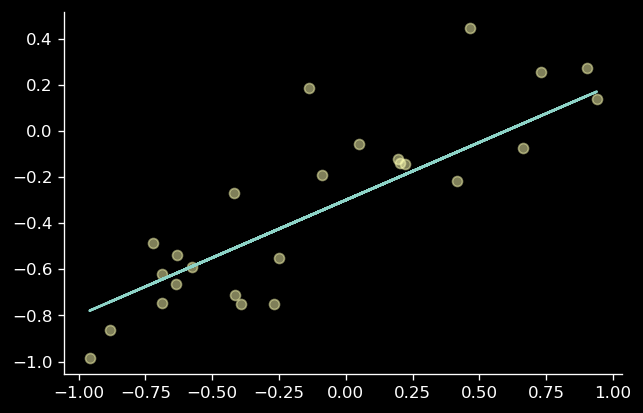

In [46]:
X, y = get_X_y()
t = np.apply_along_axis(func, 0, X)
f, ax = plt.subplots(dpi=120)
ax.plot(X, t)
ax.scatter(X,y, c='C1', marker='o', alpha=0.5)
clean_ax(ax)
plt.show()

Next step is to build the prior distribution for the parameters $\vec{w}$, which we will take to be given by:
$$p(\vec{w}|\alpha) = \mathcal{N}(\vec{w}|\mathbf{0}, \alpha^{-1}\mathbf{I}),$$
for that we can use the `numpy.random.multivariate_normal` method, as follows: